In [26]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

1.Exploratory Data Analysis (EDA):

---



In [27]:
#Read dataset using pandas
df = pd.read_excel("Talent_Academy_Case_DT_2025.xlsx")

In [28]:
#Examine dataset
print("Number of rows and columns: " , df.shape)

Number of rows and columns:  (2235, 13)


In [29]:
df.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [30]:
#Information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB
None


In [31]:
#See the distribution of the dataset
print(df.describe())

             HastaNo          Yas
count    2235.000000  2235.000000
mean   145333.100224    47.327069
std       115.214248    15.208634
min    145134.000000     2.000000
25%    145235.000000    38.000000
50%    145331.000000    46.000000
75%    145432.000000    56.000000
max    145537.000000    92.000000


In [32]:
#Missing values
df.isnull().sum()

,0
HastaNo,0
Yas,0
Cinsiyet,169
KanGrubu,675
Uyruk,0
KronikHastalik,611
Bolum,11
Alerji,944
Tanilar,75
TedaviAdi,0


In [33]:
missing_values = df.isnull().sum()

In [34]:
missing_values = missing_values[missing_values>0]

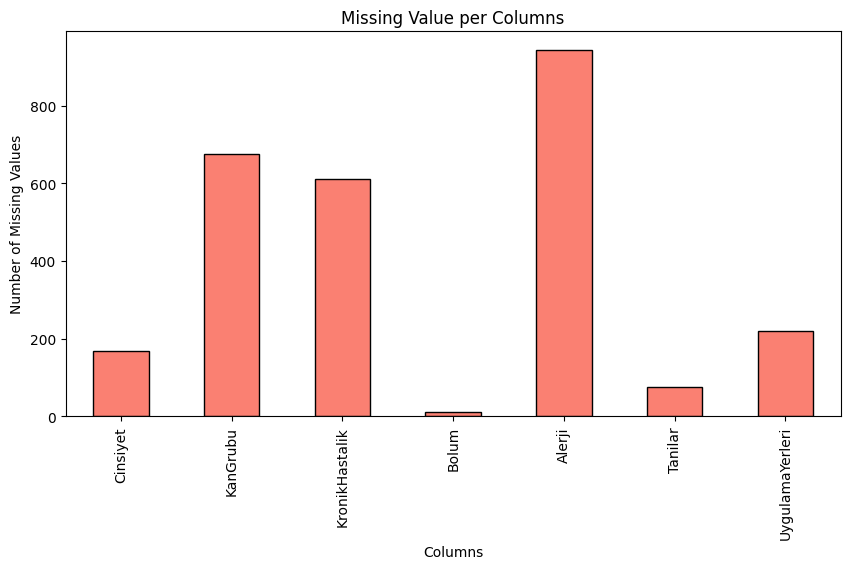

In [35]:
#Visualize Missing Values
plt.figure(figsize=(10,5))
missing_values.plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Missing Value per Columns")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.show()

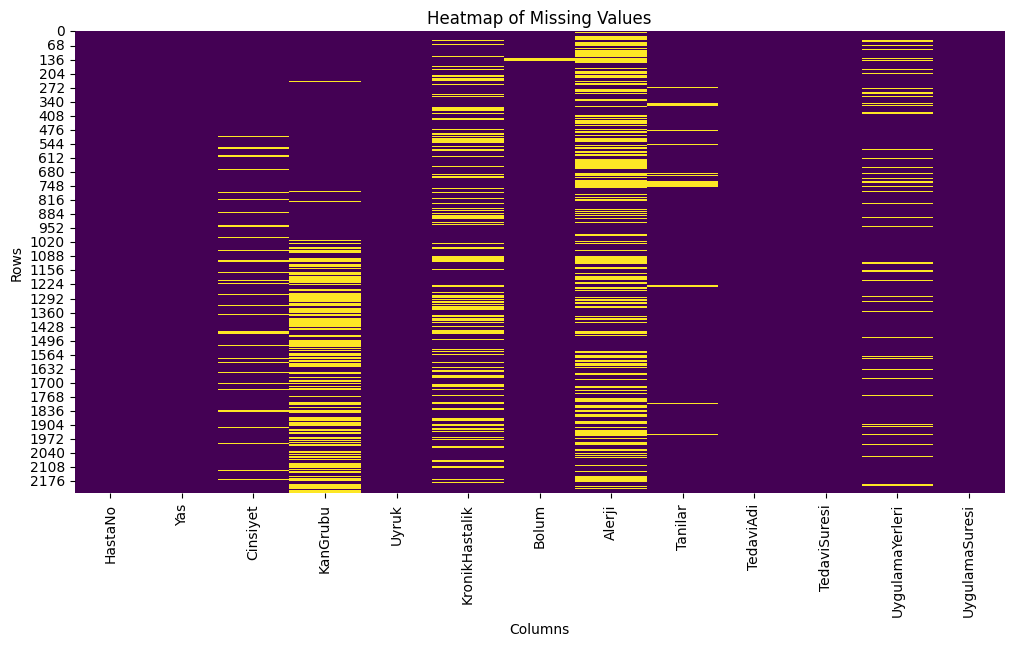

In [36]:
#Visualize Missing Values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

2.Data Pre-Processing:

---



In [37]:
#Convert target column to integer
df["TedaviSuresi"] = df["TedaviSuresi"].str.split().str[0].astype(int)

In [38]:
df["UygulamaSuresi"] = df["UygulamaSuresi"].str.split().str[0].astype(int)

In [39]:
#Handling with missing values

#The columns that filled with Mode
mode_columns = ["Cinsiyet", "KanGrubu","Bolum","UygulamaYerleri"]

#The columns that filled with "unknown"
unknown_columns = ["KronikHastalik", "Alerji","Tanilar"]

In [40]:
#SimpleImputer

mode_imputer = SimpleImputer(strategy="most_frequent")
df[mode_columns] = pd.DataFrame(
    mode_imputer.fit_transform(df[mode_columns]),
    columns=mode_columns,
    index=df.index
)

In [41]:
unknown_imputer = SimpleImputer(strategy="constant", fill_value="Bilinmiyor")
df[unknown_columns] = pd.DataFrame(
    unknown_imputer.fit_transform(df[unknown_columns]),
    columns=unknown_columns,
    index=df.index
)

In [42]:
#Check is all NaN's are filled
df.isnull().sum()

,0
HastaNo,0
Yas,0
Cinsiyet,0
KanGrubu,0
Uyruk,0
KronikHastalik,0
Bolum,0
Alerji,0
Tanilar,0
TedaviAdi,0


In [43]:
#Encoding
#1-Label Encoder
label_encoded = LabelEncoder()
df["Cinsiyet"] = label_encoded.fit_transform(df["Cinsiyet"])

In [44]:
df.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,1,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5,Ayak Bileği,20
1,145135,28,0,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Bilinmiyor,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15,Boyun,20
2,145135,28,0,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Bilinmiyor,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15,"Boyun,Sırt",20
3,145135,28,0,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Bilinmiyor,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15,Boyun,5
4,145135,28,0,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Bilinmiyor,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15,"Boyun,Sırt",20


In [45]:
#2-One Hot Encoder
ohe = OneHotEncoder(sparse_output=False)
columns = ["KanGrubu", "Uyruk","Bolum","UygulamaYerleri"]
encoded_array = ohe.fit_transform(df[columns])

In [46]:
df_encoded = pd.DataFrame(
    encoded_array,
    columns=ohe.get_feature_names_out(columns),
    index=df.index
)
df = pd.concat([df, df_encoded],axis=1)

In [47]:
print(df.columns)

Index(['HastaNo', 'Yas', 'Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik',
       'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'TedaviSuresi',
       'UygulamaYerleri', 'UygulamaSuresi', 'KanGrubu_0 Rh+', 'KanGrubu_0 Rh-',
       'KanGrubu_A Rh+', 'KanGrubu_A Rh-', 'KanGrubu_AB Rh+',
       'KanGrubu_AB Rh-', 'KanGrubu_B Rh+', 'KanGrubu_B Rh-',
       'Uyruk_Arnavutluk', 'Uyruk_Azerbaycan', 'Uyruk_Libya', 'Uyruk_Tokelau',
       'Uyruk_Türkiye', 'Bolum_Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi',
       'Bolum_Genel Cerrahi', 'Bolum_Göğüs Hastalıkları',
       'Bolum_Kalp Ve Damar Cerrahisi', 'Bolum_Kardiyoloji',
       'Bolum_Laboratuar', 'Bolum_Nöroloji', 'Bolum_Ortopedi Ve Travmatoloji',
       'Bolum_Tıbbi Onkoloji', 'Bolum_İç Hastalıkları',
       'UygulamaYerleri_Ayak Bileği', 'UygulamaYerleri_Bel',
       'UygulamaYerleri_Bel,Tüm Vücut Bölgesi', 'UygulamaYerleri_Boyun',
       'UygulamaYerleri_Boyun,Bel', 'UygulamaYerleri_Boyun,El Bilek',
       'UygulamaYerleri_Boyun,Sırt', 

In [48]:
#Standardize numeric columns
num_cols = ["Yas", "UygulamaSuresi"]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])